In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
tqdm.pandas()

/Users/jonas/opt/anaconda3/envs/dl/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Load Dataset

In [2]:
file = 'billboard_with_attributes_67741.csv'
df = pd.read_csv(file)
print(df.shape)
df.head(10)

(67741, 26)


,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,...,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",...,0.0,0.130000,7.0,0.1000,-10.965,1.0,91.0,0.3750,135.128,0.562
1,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,...,0.0,0.000000,0.0,0.0876,-8.443,1.0,76.0,0.1240,136.001,0.338
2,Jonas Brothers,Sucker,6,1.0,17.0,2019-07-06,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",Sucker \nWe go together\nBetter than birds of ...,...,0.0,0.000000,1.0,0.1060,-5.065,0.0,85.0,0.0588,137.958,0.952
3,DaBaby,Suge,7,7.0,13.0,2019-07-06,"March 1, 2019","Trap,East Coast,Rap","Jetsonmade, Pooh beatz, Dababy","Suge \nPooh, you a fool for this one\nHa\nOh L...",...,1.0,0.000000,2.0,0.1270,-6.482,0.0,82.0,0.4260,75.445,0.844
4,Lizzo,Truth Hurts,11,11.0,8.0,2019-07-06,"September 19, 2017","Pop,Rap","Ricky reed, Jesse saint john, Steven cheung, L...",Truth Hurts \nWhy're men great til they gotta ...,...,1.0,0.000000,4.0,0.1230,-3.046,0.0,81.0,0.1140,158.087,0.412
5,Taylor Swift,You Need To Calm Down,13,2.0,2.0,2019-07-06,"June 14, 2019","Synth-Pop,LGBTQ+,Pop","Joel little, Taylor swift",You Need To Calm Down \nYou are somebody that ...,...,0.0,0.000000,2.0,0.0637,-5.617,1.0,83.0,0.0553,85.026,0.714
6,Shawn Mendes,If I Can't Have You,14,2.0,8.0,2019-07-06,"May 3, 2019","Canada,Teen Pop,Pop","Dmitry fedorov, Teddy geiger, Shawn mendes, Sc...",If I Can't Have You \nI can't write one song t...,...,0.0,0.000000,2.0,0.1470,-4.198,1.0,82.0,0.0602,123.911,0.864
7,Lil Nas X,Panini,16,NaN,NaN,2019-07-06,"June 20, 2019","Memes,Atlanta,Hip-Hop,Trap,Rap","Dot da genius, Kurt cobain, David biral, Denze...","Panini \nDaytrip took it to 10 Hey\nAyy, Panin...",...,0.0,0.000000,5.0,0.1230,-6.146,0.0,77.0,0.0752,153.848,0.475
8,Halsey,Without Me,17,1.0,38.0,2019-07-06,"October 4, 2018","Synth-Pop,R&;B,Alternative Pop,Ballad,Pop,Alte...","Justin timberlake, Timbaland, Halsey, Delacey,...",Without Me \nFound you when your heart was bro...,...,1.0,0.000009,6.0,0.0936,-7.050,1.0,84.0,0.0705,136.041,0.533
9,Blake Shelton,God's Country,18,18.0,13.0,2019-07-06,"March 29, 2019",Country,"Jordan schmidt, Hardy, Devin dawson",God's Country \nRight outside of this one chur...,...,0.0,0.000005,10.0,0.1180,-5.106,1.0,75.0,0.0396,139.984,0.217


In [3]:
# (이름, 가수)가 같은 곡 제거, 각 곡 역사상 최상위 랭킹에 오른 건을 keep
sorted_table = df.sort_values(by='Weekly.rank')
dropped = sorted_table.drop_duplicates(subset=['Artists', 'Name'], keep='first', inplace=False)
dropped.reset_index(inplace=True)
print('length of dropped: {:,}'.format(len(dropped)))
dropped.sample(3)

length of dropped: 4,314


,index,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,...,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
2614,9656,LOCASH,I Know Somebody,52,52.0,7.0,2016-10-29,NaN,Country,"Rhett akins, Jeremy stover, Ross copperman",...,0.0,0.000000,1.0,0.127,-3.699,1.0,58.0,0.0370,88.986,0.491
3244,9215,The Weeknd,Attention,67,NaN,NaN,2016-12-17,"November 25, 2016","Canada,R&;B,Electro-Pop,Pop","Frank dukes, Mustafa ahmad, Cashmere cat, Benn...",...,1.0,0.000182,4.0,0.119,-7.052,0.0,66.0,0.1240,148.040,0.362
710,60487,Enya,Only Time,10,10.0,20.0,2001-11-20,"November 20, 2000","Ballad,Ireland,Adult Contemporary,New Age,Pop","Nicky ryan, Enya",...,0.0,0.661000,3.0,0.112,-13.744,1.0,71.0,0.0301,82.803,0.213


## Explore attributes & Select to use

In [4]:
attrs = dropped.columns[13:]
print('# of attributes: {}'.format(len(attrs)))
print(attrs)

# of attributes: 14
Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')


In [5]:
dropped[attrs].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.00000
mean,0.163621,0.623372,229969.027585,0.694390,0.265415,0.008349,5.225777,0.179545,-5.841591,0.681966,59.729022,0.097075,122.728485,0.50831
std,0.204126,0.142267,44468.120384,0.172276,0.441605,0.062264,3.587342,0.133793,2.181635,0.465767,11.398340,0.102830,29.784443,0.22353
min,0.000002,0.113000,73813.000000,0.056100,0.000000,0.000000,0.000000,0.019300,-23.023000,0.000000,0.000000,0.022500,48.718000,0.03490
25%,0.016725,0.528000,202046.750000,0.580000,0.000000,0.000000,2.000000,0.094900,-6.987500,0.000000,51.000000,0.034500,97.990750,0.33200
50%,0.076700,0.624000,225858.500000,0.720000,0.000000,0.000000,5.000000,0.126000,-5.505000,1.000000,60.000000,0.050400,121.532500,0.50450
75%,0.236000,0.721000,252270.000000,0.830000,1.000000,0.000021,8.000000,0.232000,-4.322000,1.000000,68.000000,0.110000,143.802500,0.68000
max,0.978000,0.986000,688453.000000,0.996000,1.000000,0.989000,11.000000,0.962000,-0.463000,1.000000,92.000000,0.740000,210.857000,0.97800


In [6]:
dropped[attrs].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      4314 non-null   float64
 1   danceability      4314 non-null   float64
 2   duration_ms       4314 non-null   float64
 3   energy            4314 non-null   float64
 4   explicit          4314 non-null   float64
 5   instrumentalness  4314 non-null   float64
 6   key               4314 non-null   float64
 7   liveness          4314 non-null   float64
 8   loudness          4314 non-null   float64
 9   mode              4314 non-null   float64
 10  popularity        4314 non-null   float64
 11  speechiness       4314 non-null   float64
 12  tempo             4314 non-null   float64
 13  valence           4314 non-null   float64
dtypes: float64(14)
memory usage: 472.0 KB


In [7]:
print(dropped['explicit'].value_counts())
print(dropped['mode'].value_counts())

0.0    3169
1.0    1145
Name: explicit, dtype: int64
1.0    2942
0.0    1372
Name: mode, dtype: int64


**NOTE**  
- duration_ms, popularity는 곡을 clustering할 만한 attributes로 볼 수 없다 판단하여 attrs에서 제거 
- explicit과 mode는 0과 1로만 이뤄진 카테고리형 변수? -> 제거

In [8]:
attrs = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']
print('# of attributes: {}'.format(len(attrs)))

# of attributes: 10


## Preprocessing
---
- Normalizing attrs columns

In [9]:
# before normalizing
dropped[attrs].head(3)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.00132,0.736,0.811,0.000142,9.0,0.1070,-4.170,0.0810,103.502,0.609
1,0.09040,0.912,0.716,0.000000,10.0,0.0491,-4.141,0.0697,94.981,0.377
2,0.59200,0.778,0.317,0.000000,1.0,0.0881,-10.732,0.3340,140.048,0.327


In [10]:
# after normalizing
normed = dropped.copy()
mms = MinMaxScaler()
mms.fit(normed[attrs])
normed[attrs] = mms.transform(normed[attrs])
normed[attrs].head(3)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.001347,0.713631,0.803171,0.000144,0.818182,0.093031,0.835683,0.081533,0.337883,0.608737
1,0.092431,0.915235,0.702096,0.000000,0.909091,0.031611,0.836968,0.065784,0.285329,0.362740
2,0.605316,0.761741,0.277583,0.000000,0.090909,0.072982,0.544814,0.434146,0.563282,0.309723


In [11]:
normed[attrs].describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
count,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,0.167299,0.584619,0.679105,0.008442,0.475071,0.169985,0.761587,0.103938,0.456463,0.501972
std,0.208719,0.162963,0.183292,0.062957,0.326122,0.141926,0.096704,0.143317,0.183697,0.237016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.017099,0.475372,0.557400,0.000000,0.181818,0.080195,0.710793,0.016725,0.303892,0.315025
50%,0.078423,0.585338,0.706352,0.000000,0.454545,0.113186,0.776507,0.038885,0.449087,0.497932
75%,0.241307,0.696449,0.823385,0.000022,0.727273,0.225629,0.828945,0.121951,0.586438,0.684021
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
normed[attrs].describe().loc['std'].sort_values()

instrumentalness    0.062957
loudness            0.096704
liveness            0.141926
speechiness         0.143317
danceability        0.162963
energy              0.183292
tempo               0.183697
acousticness        0.208719
valence             0.237016
key                 0.326122
Name: std, dtype: float64

**NOTE**  

- instrumentalness: all low
- loudness: all high
- liveness: too low
- speechiness: too low
- danceability: central
- energy: central
- tempo: central
- acousticness: little low
- valence: central
- key: suitable

In [13]:
attrs1 = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence'] # all
attrs2 = ['acousticness', 'danceability', 'energy', 'key', 'liveness',
       'speechiness', 'tempo', 'valence'] # inst. loud.
attrs3 = ['acousticness', 'danceability', 'energy', 'key', 'tempo', 'valence'] # live. speech.

## Clustering  
  
---
**TEST LIST**
1. attrs1, k=7
2. attrs1, k=5
3. attrs2, k=7
4. attrs2, k=5
5. attrs3, k=5: attr3은 feature 수가 6개이므로 k=7 작업은 하지 않음

In [14]:
import matplotlib.pyplot as plt
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [15]:
state = 42

def get_clusters(df, attrs, k=5):
    'append the cluster column'
    song_vectors = df[attrs].to_numpy()
    kmeans = KMeans(n_clusters=k, max_iter=10, n_init=1, verbose=False, random_state=state)
    clusters = kmeans.fit_predict(song_vectors)
    df_ = df.copy()
    df_['cluster'] = clusters
    return df_

def radar(df, attrs):
    num_attrs = len(attrs)
    num_clusters = len(df)
    
    angles = [x/float(num_attrs)*(2*pi) for x in range(num_attrs)]
    angles += angles[:1]
    
    my_palette = plt.cm.get_cmap('Set2', len(df))
    if num_clusters == 5:
        fig = plt.figure(figsize=(20,15))
    else:
        fig = plt.figure(figsize=(20,20))
    fig.set_facecolor('white')
    
    for i, row in df.iterrows():
        color = my_palette(i)
        data = df.loc[i].tolist()
        data += data[:1]

        if num_clusters == 5:
            ax = plt.subplot(2, 3, i+1, polar=True)
        else:
            ax = plt.subplot(3, 3, i+1, polar=True)
        ax.set_theta_offset(pi/2)
        ax.set_theta_direction(-1)

        plt.xticks(angles[:-1], attrs, fontsize=13)
        ax.tick_params(axis='x', which='major', pad=15)

        ax.set_rlabel_position(0)
        plt.ylim(0,1)

        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
        ax.fill(angles, data, color=color, alpha=0.3)

        plt.title("Cluster "+str(i), size=20, color=color, x=-0.1, y=1.2, ha='left')
    
    plt.tight_layout(pad=3)
    plt.show()

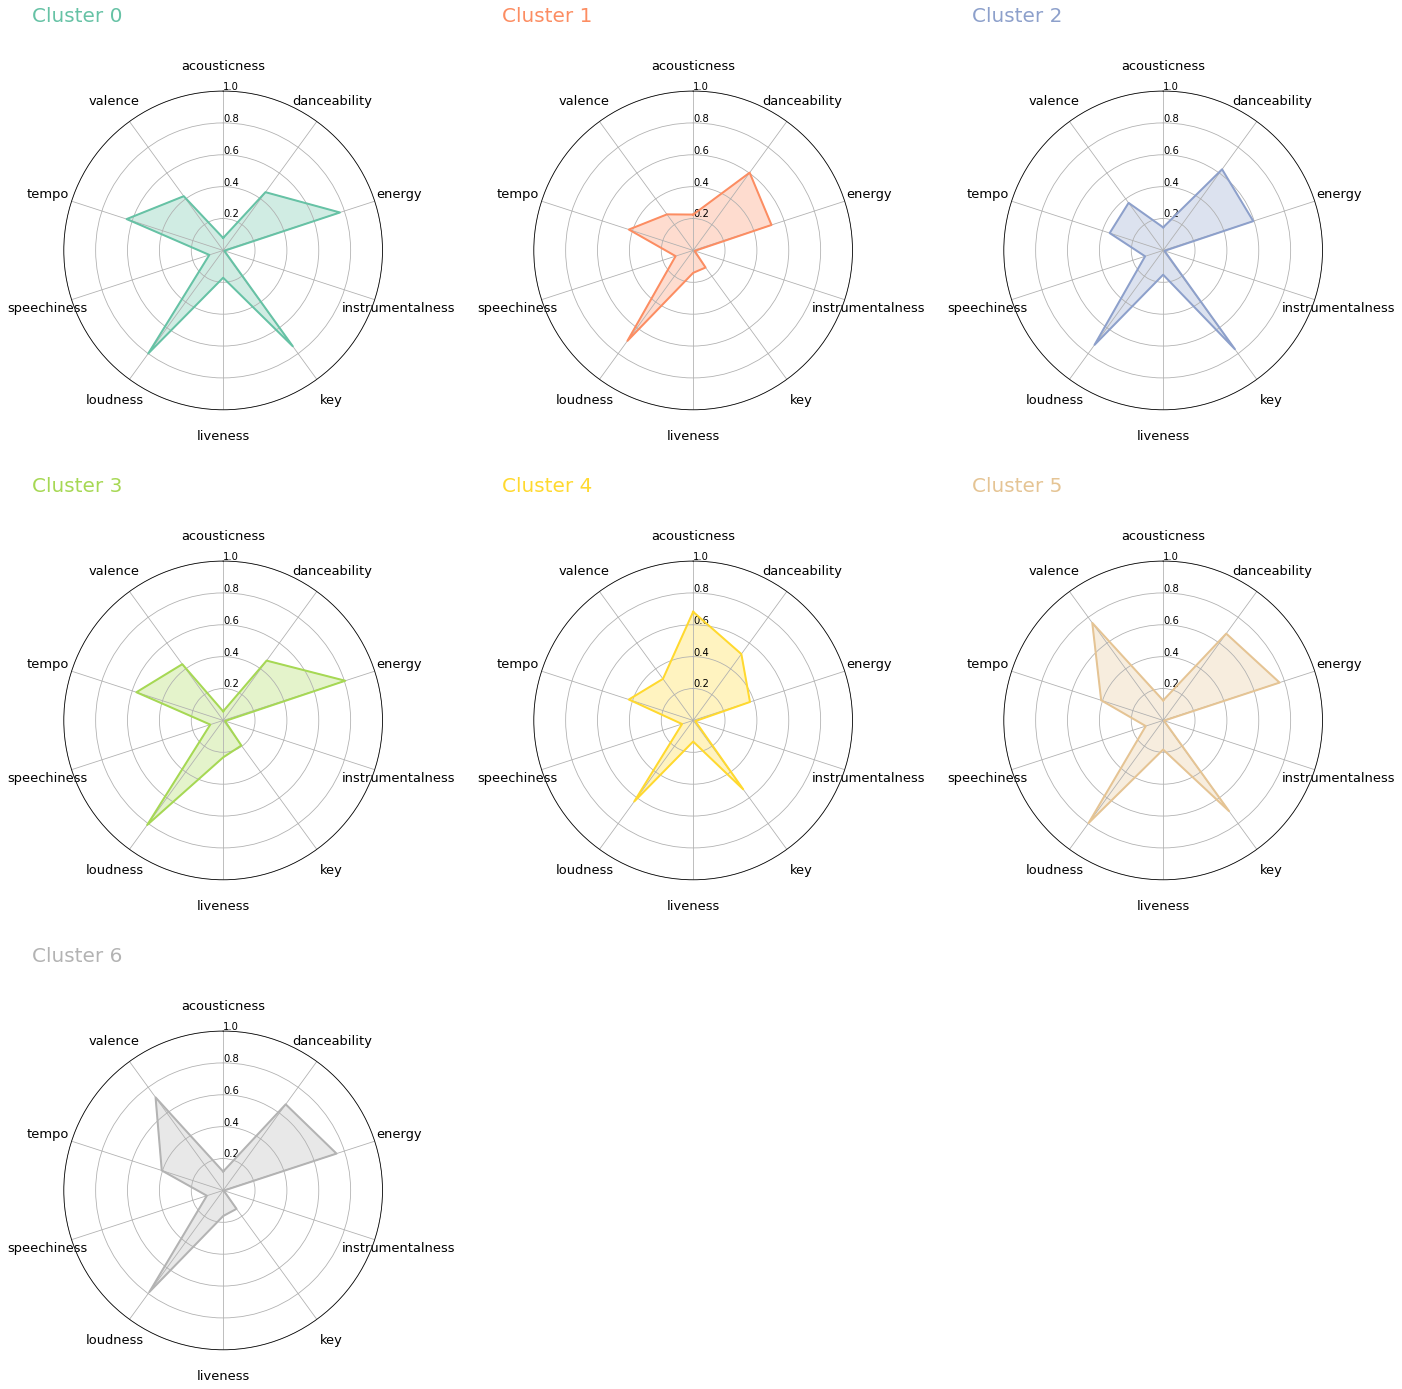

In [16]:
df1 = get_clusters(normed, attrs1, k=7)
df1_radar = pd.pivot_table(df1, index='cluster', values=attrs1, aggfunc='mean')
radar(df1_radar, attrs1)

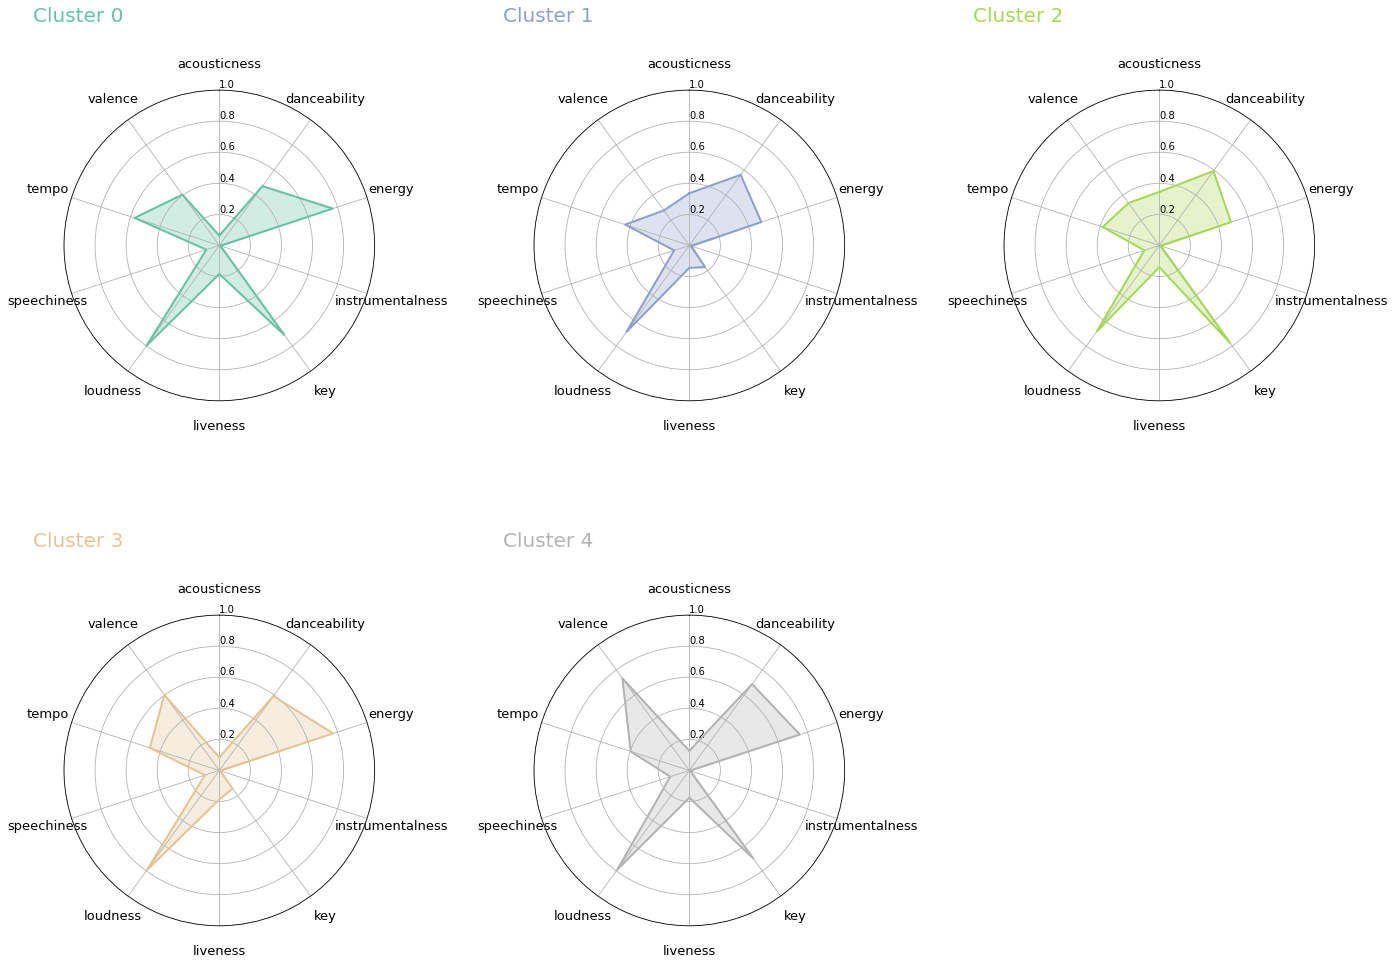

In [17]:
df2 = get_clusters(normed, attrs1, k=5)
df2_radar = pd.pivot_table(df2, index='cluster', values=attrs1, aggfunc='mean')
radar(df2_radar, attrs1)

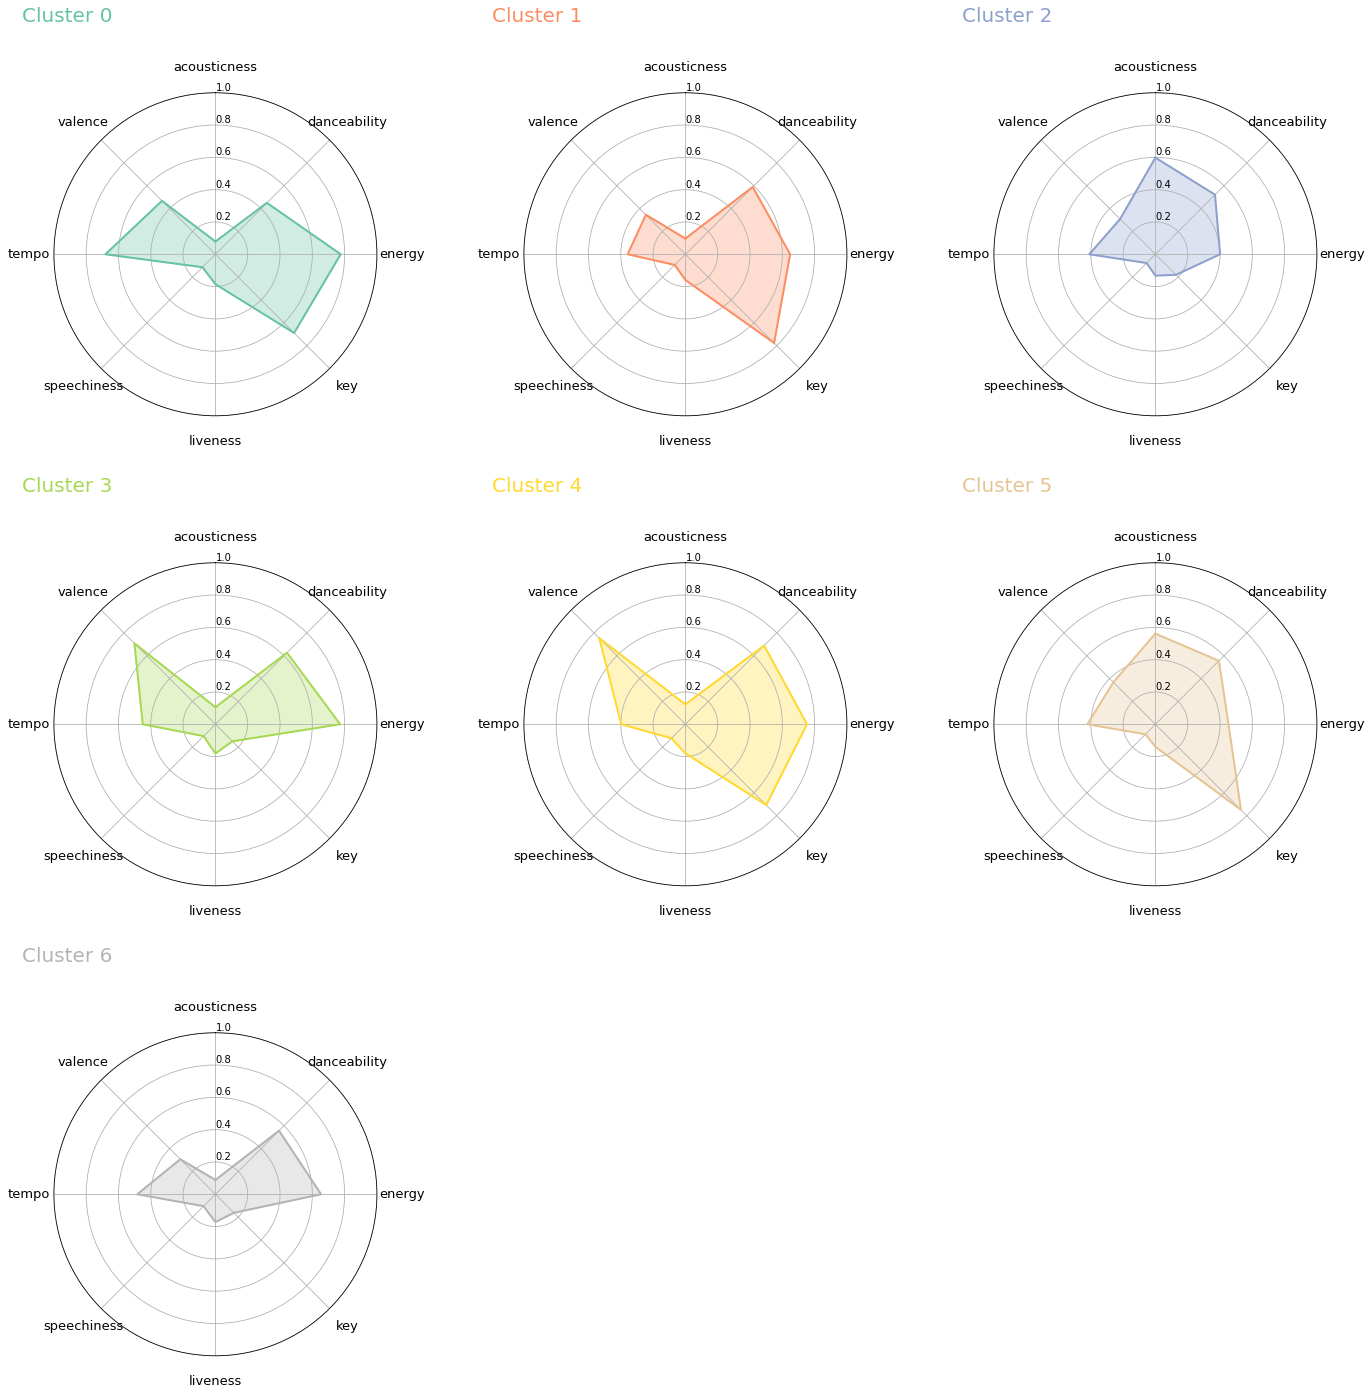

In [18]:
df3 = get_clusters(normed, attrs2, k=7)
df3_radar = pd.pivot_table(df3, index='cluster', values=attrs2, aggfunc='mean')
radar(df3_radar, attrs2)

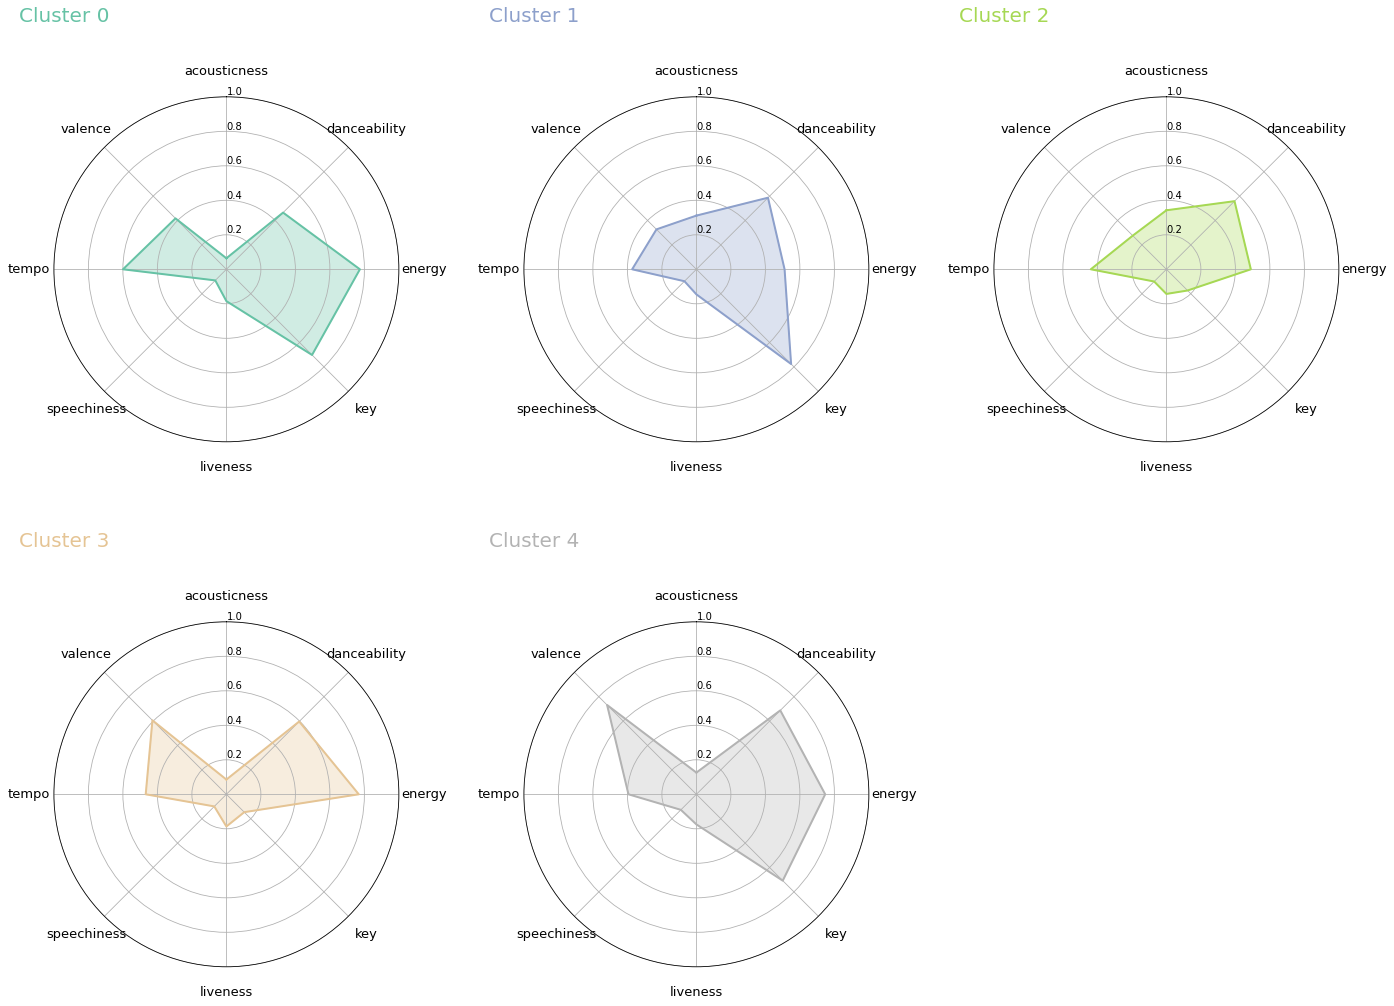

In [19]:
df4 = get_clusters(normed, attrs2, k=5)
df4_radar = pd.pivot_table(df4, index='cluster', values=attrs2, aggfunc='mean')
radar(df4_radar, attrs2)

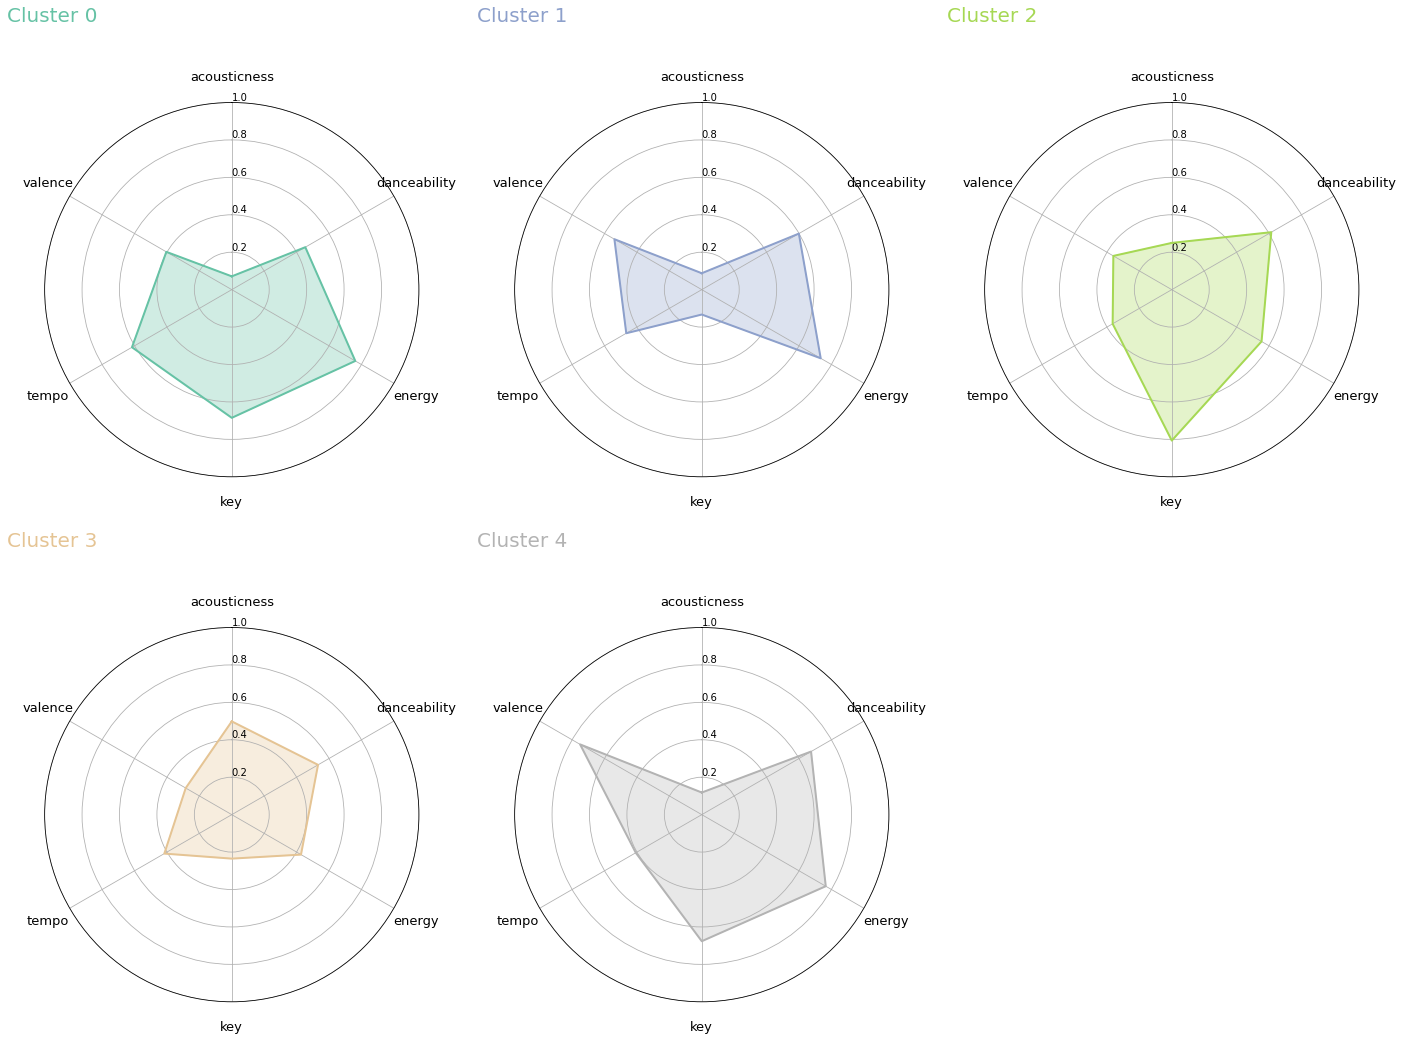

In [20]:
df5 = get_clusters(normed, attrs3, k=5)
df5_radar = pd.pivot_table(df5, index='cluster', values=attrs3, aggfunc='mean')
radar(df5_radar, attrs3)

## Explore Each Cluster
---
1. count
2. most frequent artists
3. top ranked songs
---
**LIST**  
1. test4: attrs2, k=5  
2. test5: attrs3, k=5

In [21]:
from collections import Counter

class cluster_inform:
    
    def __init__(self, df):
        self.df = df
        
    def get_counting(self):
        self.total = len(self.df)
        df_ = pd.pivot_table(self.df, index='cluster', values='Name', aggfunc='count')
        df_.columns = ['count']
        df_['rate(%)'] = round(100*df_['count'] / self.total)
        print('total count: {:,}'.format(self.total))
        return df_
    
    def get_artists(self, k=5):
        self.artists = list()
        self.num_clusters = len(self.df['cluster'].unique())
        
        for i in range(self.num_clusters):
            df_ = self.df.loc[self.df['cluster']==i, ['Artists', 'Name']]
            counter = Counter()
            counter.update(df_.Artists)
            self.artists.append(counter.most_common()[:k])
        
        for i in range(len(self.artists)):
            print('*** Frequent Artists in Cluster {} ***'.format(str(i)))
            print(self.artists[i])
            print(' ')
        
        #return self.artists
        
    def get_songs(self, k=10):
        self.songs = list()
        self.num_clusters = len(self.df['cluster'].unique())
        
        for i in range(self.num_clusters):
            df_ = self.df.loc[self.df['cluster']==i, ['Artists', 'Name', 'Weekly.rank', 'Week']]
            sorted_table = df_.sort_values(by='Weekly.rank')[:k].reset_index(drop=True)
            self.songs.append(sorted_table)
        
        for i in range(len(self.songs)):
            print('*** Top Ranked Songs in Cluster {} ***'.format(str(i)))
            print(self.songs[i][['Artists', 'Name', 'Week']])
            print(' ')
        
        # return self.songs

**test4: attrs2 & k=5**

In [22]:
t4 = cluster_inform(df4)
t4.get_counting()

total count: 4,314


,count,rate(%)
cluster,,
0,804,19.0
1,653,15.0
2,717,17.0
3,1179,27.0
4,961,22.0


In [23]:
t4.get_artists()

*** Frequent Artists in Cluster 0 ***
[('Taylor Swift', 19), ('Kelly Clarkson', 12), ('Lil Wayne', 12), ('Jason Aldean', 11), ('Nickelback', 10)]
 
*** Frequent Artists in Cluster 1 ***
[('Drake', 27), ('Kanye West', 12), ('J. Cole', 11), ('XXXTENTACION', 9), ('Taylor Swift', 9)]
 
*** Frequent Artists in Cluster 2 ***
[('Drake', 37), ('Taylor Swift', 16), ('Kanye West', 13), ('Ariana Grande', 9), ('Kenny Chesney', 9)]
 
*** Frequent Artists in Cluster 3 ***
[('Eminem', 16), ('Keith Urban', 16), ('One Direction', 14), ('Rihanna', 13), ('Justin Bieber', 13)]
 
*** Frequent Artists in Cluster 4 ***
[('Eminem', 15), ('Britney Spears', 14), ('Taylor Swift', 10), ('Nicki Minaj', 10), ('Katy Perry', 9)]
 


In [24]:
t4.get_songs(k=20)

*** Top Ranked Songs in Cluster 0 ***
                     Artists                            Name        Week
0                    Rihanna                             SOS  2006-05-24
1                       P!nk                         So What  2008-09-25
2   Eminem, Dr. Dre, 50 Cent                  Crack A Bottle  2009-02-19
3               Taylor Swift                       Bad Blood  2015-06-05
4             Kelly Clarkson              A Moment Like This  2002-10-08
5                 The Weeknd                         Starboy  2017-01-07
6                       Zayn                      Pillowtalk  2016-02-19
7            matchbox twenty                            Bent  2000-07-18
8              Avril Lavigne                      Girlfriend  2007-05-02
9                 Katy Perry                      Dark Horse  2014-02-07
10              Travis Scott                      Sicko Mode  2018-12-08
11                Nickelback               How You Remind Me  2002-01-01
12           

**test5: attrs3 & k=5**

In [25]:
t5 = cluster_inform(df5)
t5.get_counting()

total count: 4,314


,count,rate(%)
cluster,,
0,758,18.0
1,1368,32.0
2,723,17.0
3,511,12.0
4,954,22.0


In [26]:
t5.get_artists()

*** Frequent Artists in Cluster 0 ***
[('Taylor Swift', 22), ('Jason Aldean', 11), ('Nickelback', 10), ('Kelly Clarkson', 10), ('Avril Lavigne', 9)]
 
*** Frequent Artists in Cluster 1 ***
[('Drake', 29), ('Eminem', 20), ('Keith Urban', 17), ('Rihanna', 16), ('Taylor Swift', 16)]
 
*** Frequent Artists in Cluster 2 ***
[('Drake', 29), ('Kanye West', 14), ('J. Cole', 12), ('Ariana Grande', 10), ('Taylor Swift', 9)]
 
*** Frequent Artists in Cluster 3 ***
[('Drake', 19), ('Taylor Swift', 10), ('Billie Eilish', 10), ('Ed Sheeran', 9), ('Kanye West', 8)]
 
*** Frequent Artists in Cluster 4 ***
[('Britney Spears', 14), ('Eminem', 13), ('Jennifer Lopez', 10), ('Taylor Swift', 10), ('Luke Bryan', 10)]
 


In [27]:
t5.get_songs(k=20)

*** Top Ranked Songs in Cluster 0 ***
                     Artists                                   Name  \
0                    Rihanna                                    SOS   
1   Eminem, Dr. Dre, 50 Cent                         Crack A Bottle   
2               Taylor Swift                              Bad Blood   
3             Kelly Clarkson                     A Moment Like This   
4                 The Weeknd                                Starboy   
5              Avril Lavigne                             Girlfriend   
6             Kelly Clarkson         My Life Would Suck Without You   
7                       P!nk                                So What   
8               Travis Scott                             Sicko Mode   
9                 Nickelback                      How You Remind Me   
10                Katy Perry                                   Roar   
11                 Lady Gaga                          Born This Way   
12                  Coldplay           

## Export to .xlsx
1. max weeks on chart
2. a year when the highest rank
3. extract to .xlsx (total sheet and each cluster sheet)

In [28]:
df5.columns

Index(['index', 'Artists', 'Name', 'Weekly.rank', 'Peak.position',
       'Weeks.on.chart', 'Week', 'Date', 'Genre', 'Writing.Credits', 'Lyrics',
       'Features', 'Year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'cluster'],
      dtype='object')

In [29]:
attrs3

['acousticness', 'danceability', 'energy', 'key', 'tempo', 'valence']

In [30]:
cols = ['Artists', 'Name', 'Weekly.rank', 'Week', 'Genre', 'acousticness', 
       'danceability', 'energy', 'key', 'tempo', 'valence', 'cluster'] # columns to use
df5_ = df5.copy()[cols]
df5_.sample(3)

,Artists,Name,Weekly.rank,Week,Genre,acousticness,danceability,energy,key,tempo,valence,cluster
3207,Kid Rock,First Kiss,66,2015-03-13,Rock,0.003965,0.575029,0.886158,0.363636,0.513399,0.661754,1
1622,Joe Nichols,The Impossible,29,2002-10-01,Country,0.361962,0.577320,0.476540,0.818182,0.180524,0.171880,2
4278,TakeOff,Casper,99,2018-11-17,"Trap,Motown,Rap",0.536809,0.925544,0.586126,0.090909,0.563424,0.761425,1


### max weeks on chart

In [31]:
# total (artist, song) list
songs = list()
for i in range(len(df5_)):
    songs.append((df5_.Artists[i], df5_.Name[i]))
print(len(songs))
songs[:3]

4314


[('Crazy Town', 'Butterfly'),
 ('Iggy Azalea', 'Fancy'),
 ('Ariana Grande', '7 Rings')]

In [32]:
# max.weeks.on.chart
max_weeks_col = list()
for idx, (artist, name) in enumerate(songs):
    max_weeks = np.max(df.loc[(df['Artists']==artist) & (df['Name']==name), 'Weeks.on.chart'])
    max_weeks_col.append(max_weeks)

In [33]:
# change nan to zero
max_weeks_col = np.array(max_weeks_col)
max_weeks_col_zero = np.where(np.isnan(max_weeks_col), 0, max_weeks_col)

In [34]:
df5_['Max.Weeks.on.chart'] = max_weeks_col_zero
print(df5_.columns)
print(df5_['Max.Weeks.on.chart'][:5])

Index(['Artists', 'Name', 'Weekly.rank', 'Week', 'Genre', 'acousticness',
       'danceability', 'energy', 'key', 'tempo', 'valence', 'cluster',
       'Max.Weeks.on.chart'],
      dtype='object')
0    23.0
1    39.0
2    23.0
3    29.0
4    31.0
Name: Max.Weeks.on.chart, dtype: float64


### extract year

In [35]:
from datetime import datetime

def extract_year(s):
    return datetime.strptime(s, '%Y-%m-%d').year

df5_['Year'] = df5_['Week'].apply(extract_year)
df5_.sample(3)[['Year', 'Week']]

,Year,Week
1536,2018,2018-09-08
4020,2005,2005-02-16
1087,2018,2018-05-12


### export sheets to .xlsx

In [36]:
# change cols order
df_final = df5_[['Artists', 'Name', 'Year', 'Weekly.rank', 'Week', 'Max.Weeks.on.chart', 'Genre',
                 'acousticness', 'danceability', 'energy', 'key', 'tempo', 'valence', 'cluster']]
df_final.head(3)

,Artists,Name,Year,Weekly.rank,Week,Max.Weeks.on.chart,Genre,acousticness,danceability,energy,key,tempo,valence,cluster
0,Crazy Town,Butterfly,2001,1,2001-04-03,23.0,"Rock,Rap",0.001347,0.713631,0.803171,0.818182,0.337883,0.608737,4
1,Iggy Azalea,Fancy,2014,1,2014-07-11,39.0,"Fashion,Hyphy,Electronic,UK Rap,UK,Australia,E...",0.092431,0.915235,0.702096,0.909091,0.285329,0.362740,2
2,Ariana Grande,7 Rings,2019,1,2019-03-02,23.0,"Memes,Trap,R&;B,Pop",0.605316,0.761741,0.277583,0.090909,0.563282,0.309723,3


In [37]:
export_dict = {'total': df_final}
for i in range(len(df_final['cluster'].unique())):
    export_dict['cluster_{}'.format(i)] = df_final.loc[df_final['cluster']==i]

In [38]:
# export to xlsx, sheet: ['total', 'cluster_0', 'cluster_1', ...]
with pd.ExcelWriter('ML_clusters.xlsx') as writer:
    for (sheet, df) in export_dict.items():
        df.to_excel(writer, index=False, sheet_name=sheet)

In [39]:
means = pd.pivot_table(df_final, index='cluster', values=attrs3, aggfunc='mean')
means

,acousticness,danceability,energy,key,tempo,valence
cluster,,,,,,
0,0.071055,0.453619,0.761991,0.684936,0.615764,0.403793
1,0.087703,0.598848,0.733740,0.132974,0.465931,0.539023
2,0.249718,0.613902,0.553779,0.806488,0.364875,0.360494
3,0.498261,0.532139,0.427019,0.235012,0.416200,0.284172
4,0.118171,0.674217,0.764908,0.676291,0.407292,0.750733


In [40]:
means.to_excel('means.xlsx', index=True)